In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

import runner
import config

In [2]:
Omega_a_h_sq_harm, theta_i_s_harm, f_a_s_harm = runner.load_data(config.data_path + "/harmonic.npz")
Omega_a_h_sq, theta_i_s, f_a_s = runner.load_data(config.data_path + "/cosine.npz")

In [3]:
f = Omega_a_h_sq / Omega_a_h_sq_harm
f = np.mean(f, axis=1)[:-1]
theta = theta_i_s_harm[:-1]

In [22]:
def fit_fn1(theta, alpha):
    return np.log(np.exp(1) / (1 - (theta/np.pi)**2))**alpha

def fit_fn2(theta, alpha, beta):
    return np.log(np.exp(1) / (1 - (theta/np.pi)**2)**beta)**alpha

def do_fit(fit_fn, theta, f, guess):
    p, cov = curve_fit(fit_fn, theta, f, p0=guess, method="dogbox")
    err = np.sqrt(np.diag(cov))
    print(p, err)
    chi_sq = np.sum((f - fit_fn(theta, *p))**2 / fit_fn(theta, *p))
    print("chi^2 =", chi_sq)
    plt.plot(theta, f, label="numerical")
    plt.plot(theta, fit_fn(theta, *p), label="fit")
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$f$")
    plt.legend()
    return p, cov

def do_fits(theta, f, name):
    print(name + ":")
    print("only alpha:")
    do_fit(fit_fn1, theta, f, (7/6,))
    plt.savefig(config.plot_path + f"/{name}_anharm1.pdf")
    plt.show()
    print("alpha and beta:")
    plt.figure()
    do_fit(fit_fn2, theta, f, (7/6, 2))
    plt.savefig(config.plot_path + f"/{name}_anharm2.pdf")    

## Sebastians Result

In [16]:
seb_theta, seb_anharm = np.loadtxt("../Data/sebastian_relic_density_fa_12.dat", unpack=True)
seb_f_a = 1e12 * 1e9
# = Omega(theta) / Omega(theta = 1e-4) / theta^2

seb:
only alpha:
[1.24614113] [0.00468649]
chi^2 = 0.8151152001755925


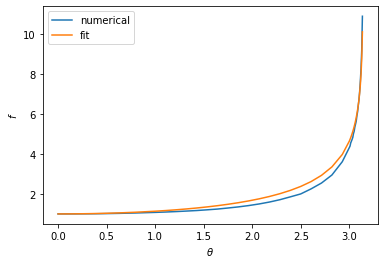

alpha and beta:
[1.79051244 0.52216017] [0.02174124 0.01046028]
chi^2 = 0.07533523829881492


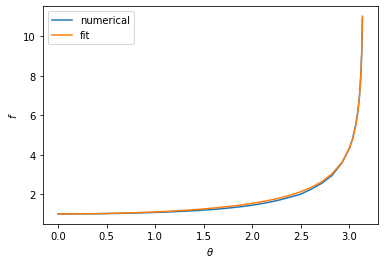

In [19]:
do_fits(seb_theta[:-1], seb_anharm[:-1], "seb")

## Janas Result

In [20]:
i = np.where(f_a_s / 1e9 == 1e12)[0][0]
norm = float(interp1d(theta_i_s, Omega_a_h_sq[:, i] / theta_i_s**2)(1e-4))
jana_anharm = Omega_a_h_sq[:, i] / norm / theta_i_s**2

jana:
only alpha:
[0.93660931] [0.00554175]
chi^2 = 1.0467447332709054


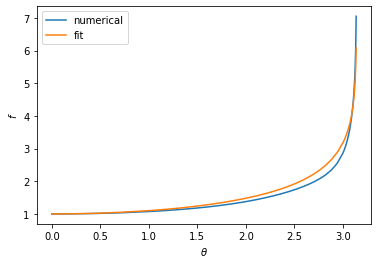

alpha and beta:
[1.84173719 0.323124  ] [0.02406663 0.00619139]
chi^2 = 0.047208615257320924


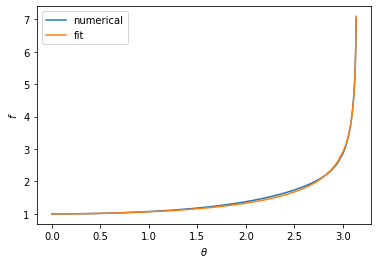

In [21]:
do_fits(theta_i_s[:-1], jana_anharm[:-1], "jana");

## Comparision Plot

/home/jana/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


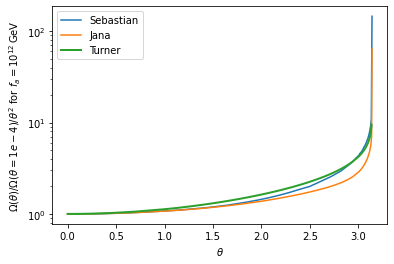

In [81]:
plt.plot(seb_theta, seb_anharm, label="Sebastian")
plt.plot(theta_i_s, jana_anharm, label="Jana")
plt.plot(theta_i_s, fit_fn(theta_i_s, 7/6, 1), lw=2, label="Turner")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\Omega(\theta) / \Omega(\theta = 1e-4) / \theta^2$ for $f_a = 10^{12} \, \mathrm{GeV}$")
plt.legend()
plt.yscale("log")
plt.savefig(config.plot_path + "/comparision_anharm.pdf")